In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
import pandas as pd
import numpy as np

from make_multipage_pdf import measurement, parse_tree

In [2]:
ls aux

20170419.DRIVE_CONTROL_CLIENT_LIST.fits
20170419.DRIVE_CONTROL_MESSAGE.fits
20170419.DRIVE_CONTROL_POINTING_POSITION.fits
20170419.DRIVE_CONTROL_SOURCE_POSITION.fits
20170419.DRIVE_CONTROL_STATE.fits
20170419.DRIVE_CONTROL_STATUS.fits
20170419.DRIVE_CONTROL_TRACKING_POSITION.fits
20170420.DRIVE_CONTROL_MESSAGE.fits
20170420.DRIVE_CONTROL_POINTING_POSITION.fits
20170420.DRIVE_CONTROL_SOURCE_POSITION.fits
20170420.DRIVE_CONTROL_STATE.fits
20170420.DRIVE_CONTROL_STATUS.fits
20170420.DRIVE_CONTROL_TRACKING_POSITION.fits
20170421.DRIVE_CONTROL_MESSAGE.fits


In [3]:
ls

20170419/                              aux/                   multipage_pdf.pdf
20170420/                              DriveTest20170420/     __pycache__/
assign time to IndraDrive stuff.ipynb  make_multipage_pdf.py


In [4]:
ls DriveTest20170420/

MovingToMrk421.txt*  Trigger90PercentTorque_2.txt*  WobbleChangeMrk421_2.txt*
MovingToMrk421.xml*  Trigger90PercentTorque_2.xml*  WobbleChangeMrk421_2.xml*
MovingToMrk501.txt*  Trigger90PercentTorque_2.zip*  WobbleChangeMrk421.txt*
MovingToMrk501.xml*  Trigger90PercentTorque.txt*    WobbleChangeMrk421.xml*
TrackingMrk501.txt*  Trigger90PercentTorque.xml*    WobbleChangeMrk501.txt*
TrackingMrk501.xml*  Trigger90PercentTorque.zip*    WobbleChangeMrk501.xml*


In [5]:
df = measurement(parse_tree('DriveTest20170420/Trigger90PercentTorque.xml'))
df['sample_time'] = df.index.values - df.index.values[0]
names = df.columns
df[names[3]] -= 1.3333  # this seems to be the difference between this and the aux files Az value
df.head()

,Beschleunigungsistwert 1(rad/sÂ²),Drehmoment-/Kraft-Istwert(% ),Geschwindigkeits-Istwert(U/min ),Lage-Istwert Geber 1(Grad),sample_time
-57350.0,0.049606,-4.7,-3.9911,24.6316,0.0
-57340.0,0.672090,-4.4,-4.0162,24.6314,10.0
-57330.0,-1.546147,-4.9,-3.9339,24.6313,20.0
-57320.0,-1.377536,-4.6,-3.9268,24.6311,30.0
-57310.0,0.229543,-4.4,-3.9339,24.6310,40.0


In [6]:

names

Index([' Beschleunigungsistwert 1(rad/sÂ²)', ' Drehmoment-/Kraft-Istwert(% )',
       ' Geschwindigkeits-Istwert(U/min )', ' Lage-Istwert Geber 1(Grad)',
       'sample_time'],
      dtype='object')

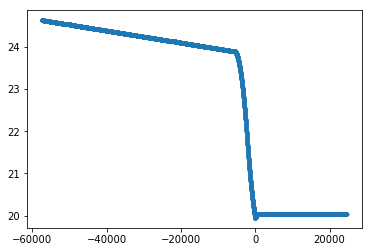

In [7]:
plt.plot(df[names[3]], '.')

In [8]:
aux = Table.read('aux/20170420.DRIVE_CONTROL_POINTING_POSITION.fits')
aux = aux.to_pandas()
aux['Time'] = pd.to_datetime(aux.Time, unit='d')
aux.set_index('Time', inplace=True)

(10, 50)

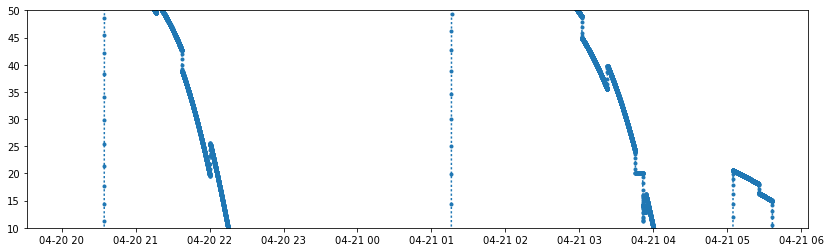

In [9]:
plt.figure(figsize=(14, 4))
plt.plot(aux.Az, '.:')
plt.ylim(10, 50)

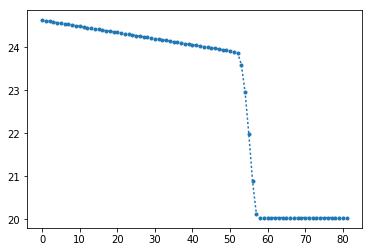

In [10]:
a = df[names[3]].values[::100]
plt.plot(a, '.:')

In [11]:
az = aux.Az.resample('1s').bfill()

In [12]:
from tqdm import trange

In [13]:
r = []
N = a.shape[0]
for i in trange(az.shape[0] - N -1):
    r.append(((az.values[i:i+N] - a)**2).sum())
r = np.array(r)

100%|██████████| 34497/34497 [00:00<00:00, 157697.31it/s]


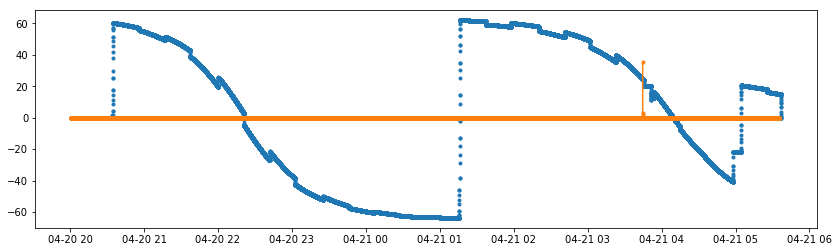

In [14]:
plt.figure(figsize=(14, 4))
plt.plot(az, '.')
plt.plot(az.index.values[:len(r)], 1/r * 10, '.:')

In [15]:
start_time = az.index[r.argmin()] + pd.to_timedelta(1, unit='s')

In [16]:
df['Time'] = start_time + pd.to_timedelta(df.sample_time, unit='ms')
df.reset_index(inplace=True)
df.set_index('Time', inplace=True)

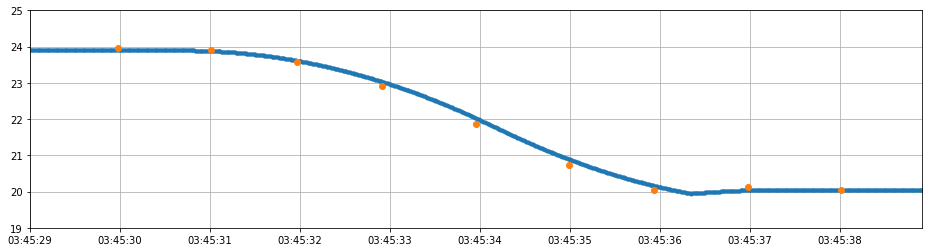

In [17]:
plt.figure(figsize=(16,4))
plt.plot(df[names[3]], '.')
plt.plot(aux.Az, 'o')
plt.xlim(df.index[5000], df.index[-2200])
plt.ylim(19, 25)
plt.grid()

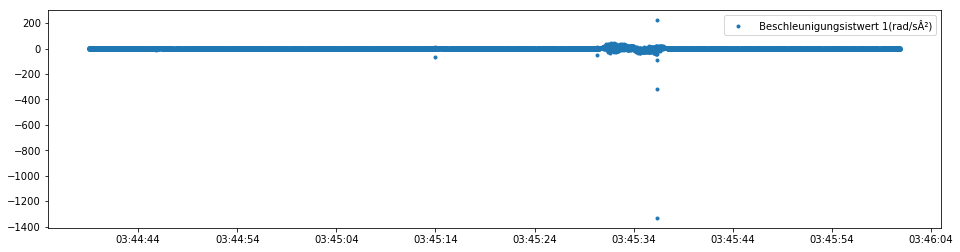

In [19]:
plt.figure(figsize=(16,4))
plt.plot(df[names[0]], '.', label=names[0])
plt.legend()

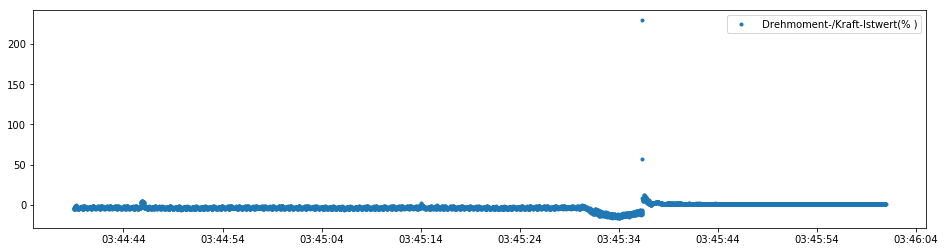

In [20]:
plt.figure(figsize=(16,4))
plt.plot(df[names[1]], '.', label=names[1])
plt.legend()

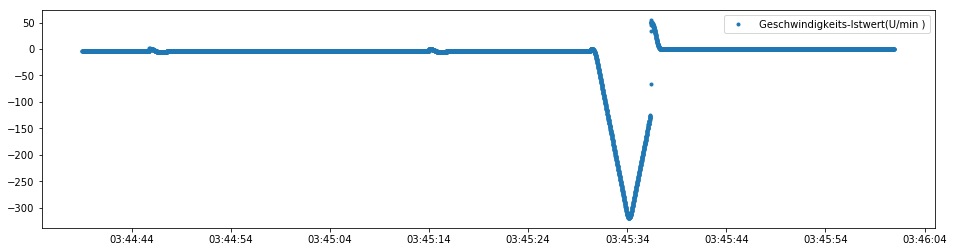

In [21]:
plt.figure(figsize=(16,4))
plt.plot(df[names[2]], '.', label=names[2])
plt.legend()

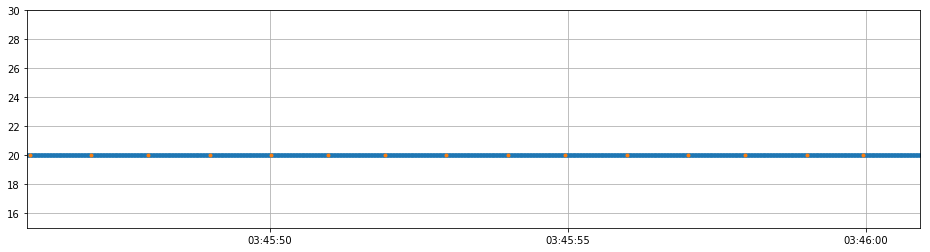

In [22]:
plt.figure(figsize=(16,4))
plt.plot(df[names[3]], '.')
plt.plot(aux.Az, '.')
plt.xlim(df.index[-1500], df.index[-1])
plt.ylim(15, 30)
plt.grid()